In [1]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.4 MB/s eta 0:00:00


In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 그래프에 한글 적용을 위한 설정
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [3]:
from google.colab import drive

drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [4]:
lotto = pd.read_excel("/content/gdrive/MyDrive/lotto_1064.xlsx")
lotto

회차         추첨일   1   2   3   4   5   6  보너스
0     1064  2023.04.22   3   6   9  18  22  35   14
1     1063  2023.04.15   3   6  22  23  24  38   30
2     1062  2023.04.08  20  31  32  40  41  45   12
3     1061  2023.04.01   4  24  27  35  37  45   15
4     1060  2023.03.25   3  10  24  33  38  45   36
...    ...         ...  ..  ..  ..  ..  ..  ..  ...
1059     5  2003.01.04  16  24  29  40  41  42    3
1060     4  2002.12.28  14  27  30  31  40  42    2
1061     3  2002.12.21  11  16  19  21  27  31   30
1062     2  2002.12.14   9  13  21  25  32  42    2
1063     1  2002.12.07  10  23  29  33  37  40   16

[1064 rows x 9 columns]

In [5]:
lotto["year"] = lotto["추첨일"].str.split(".").str.get(0).astype(int)
lotto["month"] = lotto["추첨일"].str.split(".").str.get(1).astype(int)
lotto["day"] = lotto["추첨일"].str.split(".").str.get(2).astype(int)
lotto.head()

회차         추첨일   1   2   3   4   5   6  보너스  year  month  day
0  1064  2023.04.22   3   6   9  18  22  35   14  2023      4   22
1  1063  2023.04.15   3   6  22  23  24  38   30  2023      4   15
2  1062  2023.04.08  20  31  32  40  41  45   12  2023      4    8
3  1061  2023.04.01   4  24  27  35  37  45   15  2023      4    1
4  1060  2023.03.25   3  10  24  33  38  45   36  2023      3   25

In [6]:
lotto["추첨일"] = pd.to_datetime(lotto["추첨일"])
lotto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회차      1064 non-null   int64         
 1   추첨일     1064 non-null   datetime64[ns]
 2   1       1064 non-null   int64         
 3   2       1064 non-null   int64         
 4   3       1064 non-null   int64         
 5   4       1064 non-null   int64         
 6   5       1064 non-null   int64         
 7   6       1064 non-null   int64         
 8   보너스     1064 non-null   int64         
 9   year    1064 non-null   int64         
 10  month   1064 non-null   int64         
 11  day     1064 non-null   int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 99.9 KB


In [8]:
# 1064 기준 최근 50회의 각 자리의 평균숫자. 
lotto.head(50).describe().loc[["mean"]]

회차     1      2      3      4      5      6    보너스     year  month  \
mean  1039.5  7.98  14.64  20.98  26.58  32.82  39.62  22.02  2022.32   6.72   

       day  
mean  15.5

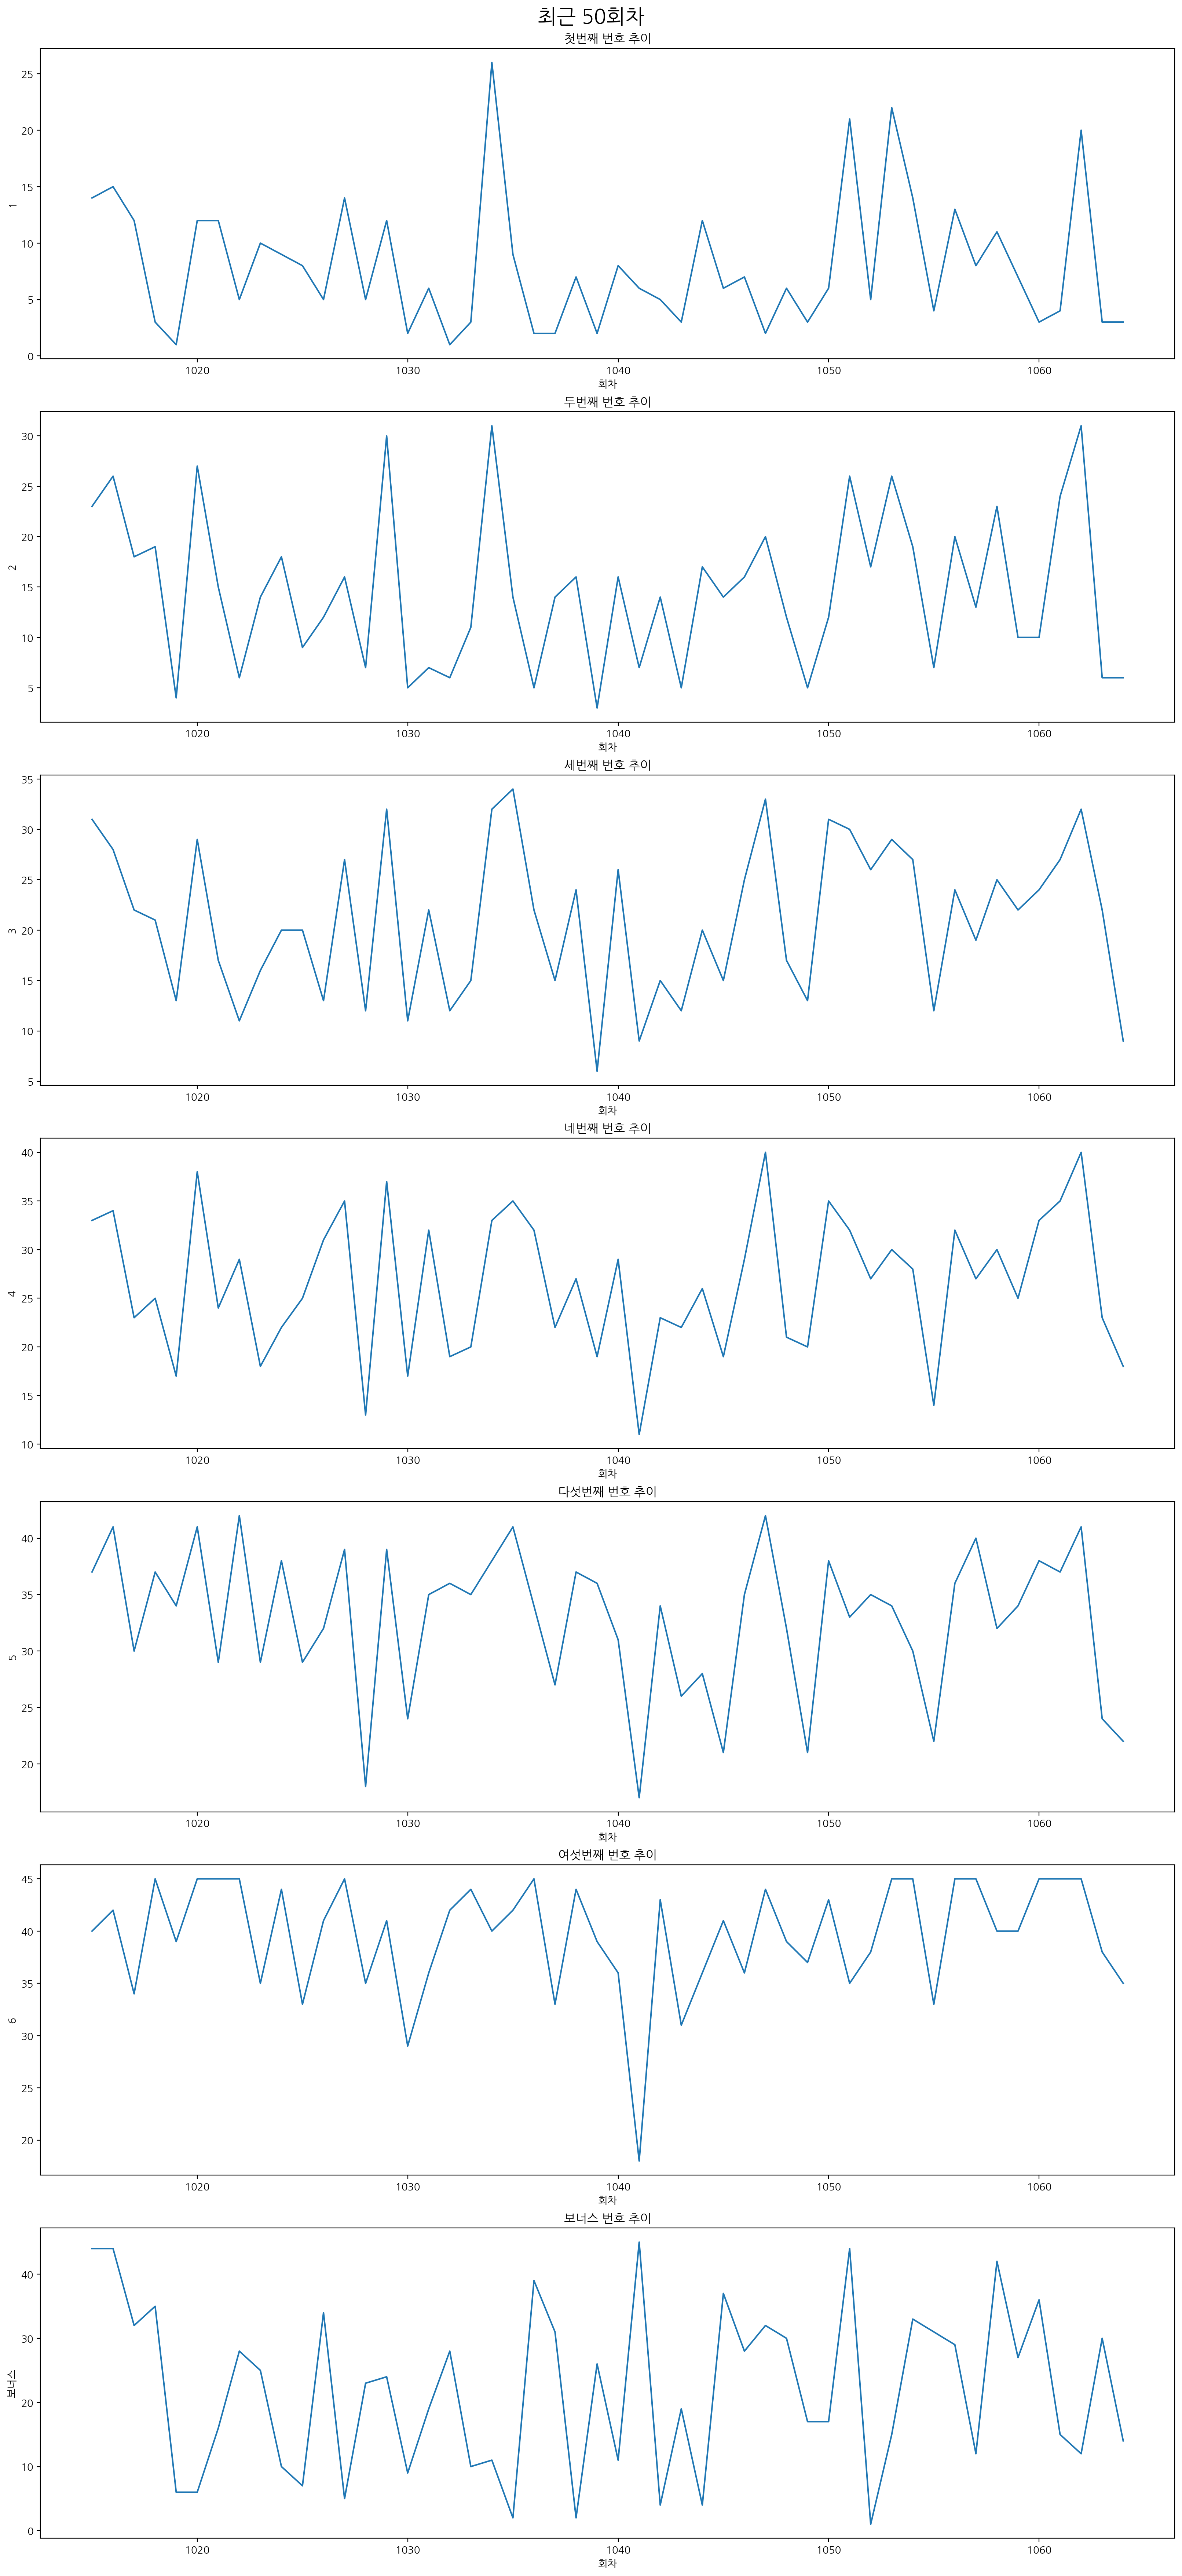

In [9]:
fig, axes = plt.subplots(7, 1, figsize=(16, 35), layout='constrained')
fig.suptitle("최근 50회차", fontsize=20)
sns.lineplot(data=lotto.head(50), x="회차", y=1, ax=axes[0]).set_title("첫번째 번호 추이")
sns.lineplot(data=lotto.head(50), x="회차", y=2, ax=axes[1]).set_title("두번째 번호 추이")
sns.lineplot(data=lotto.head(50), x="회차", y=3, ax=axes[2]).set_title("세번째 번호 추이")
sns.lineplot(data=lotto.head(50), x="회차", y=4, ax=axes[3]).set_title("네번째 번호 추이")
sns.lineplot(data=lotto.head(50), x="회차", y=5, ax=axes[4]).set_title("다섯번째 번호 추이")
sns.lineplot(data=lotto.head(50), x="회차", y=6, ax=axes[5]).set_title("여섯번째 번호 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="보너스", ax=axes[6]).set_title("보너스 번호 추이");

In [10]:
lotto.head(10)

회차        추첨일   1   2   3   4   5   6  보너스  year  month  day
0  1064 2023-04-22   3   6   9  18  22  35   14  2023      4   22
1  1063 2023-04-15   3   6  22  23  24  38   30  2023      4   15
2  1062 2023-04-08  20  31  32  40  41  45   12  2023      4    8
3  1061 2023-04-01   4  24  27  35  37  45   15  2023      4    1
4  1060 2023-03-25   3  10  24  33  38  45   36  2023      3   25
5  1059 2023-03-18   7  10  22  25  34  40   27  2023      3   18
6  1058 2023-03-11  11  23  25  30  32  40   42  2023      3   11
7  1057 2023-03-04   8  13  19  27  40  45   12  2023      3    4
8  1056 2023-02-25  13  20  24  32  36  45   29  2023      2   25
9  1055 2023-02-18   4   7  12  14  22  33   31  2023      2   18

- 최근 10회동안 45번이 5번 나왔다. 
- 최근 2회차동안 번호가 많이 낮아져서, 이번에는 높은 번호가 나올 것이 예상된다. 

## 회귀 해보자

In [13]:
X = lotto[['회차', 'year', 'month', 'day']]
y = lotto[1]

print(X.shape, y.shape)

(1064, 4) (1064,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid  = train_test_split(X, y, test_size=0.2, random_state=42, )

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((851, 4), (213, 4), (851,), (213,))

### random forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=120, random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_estimators=120, n_jobs=-1, random_state=42)

In [16]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, n_jobs=-1, random_state=42)

In [34]:
y_predict = model.predict(X_valid)
y_predict

array([ 7.54166667,  5.64166667,  7.00833333,  6.33333333, 10.91666667,
       10.44166667,  5.925     ,  6.10833333,  4.81666667,  5.85833333,
        6.13333333, 10.60833333,  3.975     ,  4.13333333,  4.95      ,
        4.70833333,  6.49166667,  6.49166667,  5.65      ,  6.475     ,
        6.05      ,  5.9       ,  5.35833333,  9.28333333,  8.50833333,
        6.74166667,  9.00833333,  6.44166667,  6.78333333,  4.99166667,
       14.79166667,  6.84166667, 12.775     ,  6.73333333,  6.13333333,
        6.9       ,  7.45833333,  4.325     ,  4.1       ,  6.26666667,
        7.34166667,  5.76666667,  4.99166667,  6.40833333,  5.19166667,
        5.80833333,  4.68333333,  5.65      ,  5.75833333, 10.71666667,
        4.9       ,  6.11666667,  7.56666667,  6.85833333,  8.89166667,
        7.81666667,  7.93333333,  5.975     ,  7.275     ,  7.91666667,
        8.76666667,  7.51666667,  5.00833333,  6.45      ,  6.725     ,
        6.56666667,  3.61666667,  9.76666667,  6.225     ,  5.  

In [56]:
predict = y_predict.round().astype(int)
predict = pd.Series(predict).reset_index().set_index(y_valid.index)
predict = predict[0]
predict

31       8
1053     6
413      7
746      6
796     11
        ..
583      9
55       6
120      8
1005     8
25       5
Name: 0, Length: 213, dtype: int64

In [41]:
y_valid

31       3
1053     1
413     11
746      2
796      3
        ..
583      3
55      15
120      2
1005     6
25       2
Name: 1, Length: 213, dtype: int64

In [58]:
p_df = pd.concat([y_valid, predict], axis=1)
p_df

1   0
31     3   8
1053   1   6
413   11   7
746    2   6
796    3  11
...   ..  ..
583    3   9
55    15   6
120    2   8
1005   6   8
25     2   5

[213 rows x 2 columns]

In [62]:
(p_df[1] == p_df[0]).sum(), p_df.shape , 15/213*100

(15, (213, 2), 7.042253521126761)

<Axes: xlabel='1', ylabel='0'>

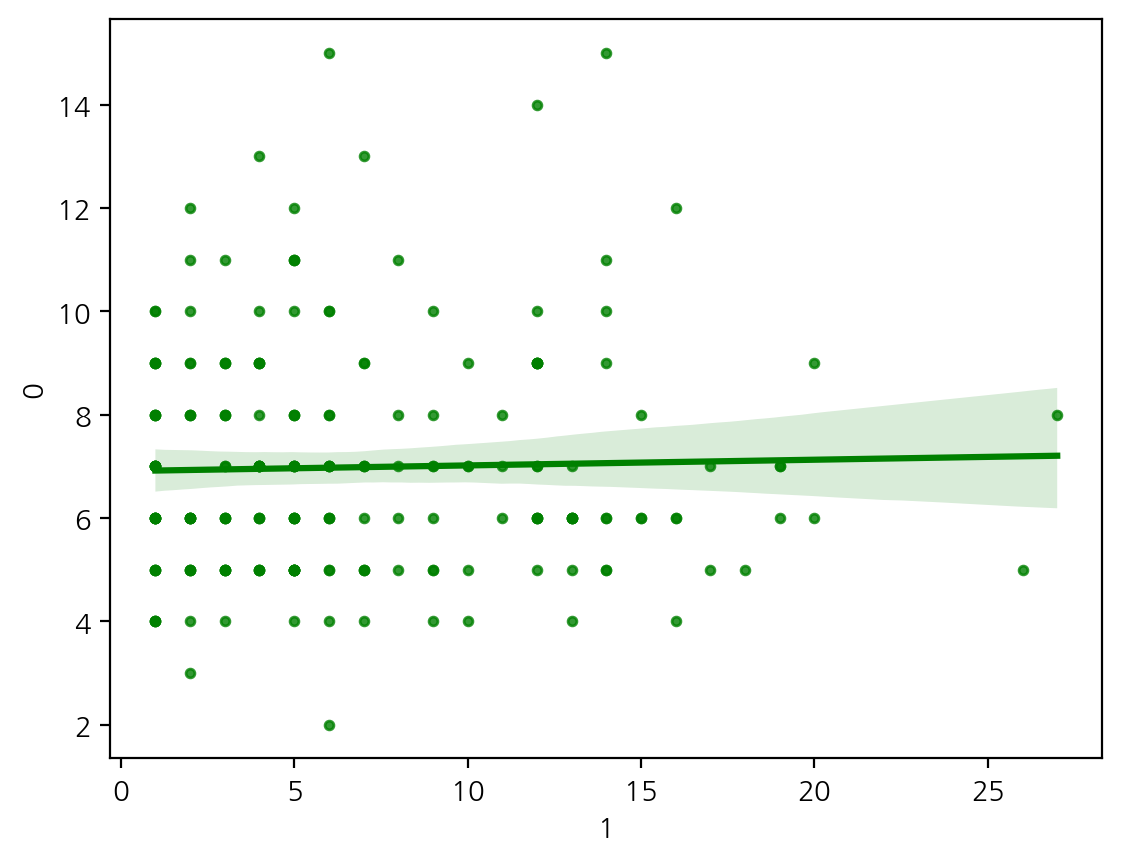

In [63]:
sns.regplot(data=p_df, x=p_df[1], y=p_df[0], color="Green", scatter_kws={"s": 10}, )

- 이건 뭔가... 아닌거 같다. 
- 남들도 이러는지 확인해보자. 
- xgb 모델이면 어떨까?

In [67]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(random_state=42, n_jobs=-1, max_depth=4, n_estimators=200, gamma=10)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [68]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

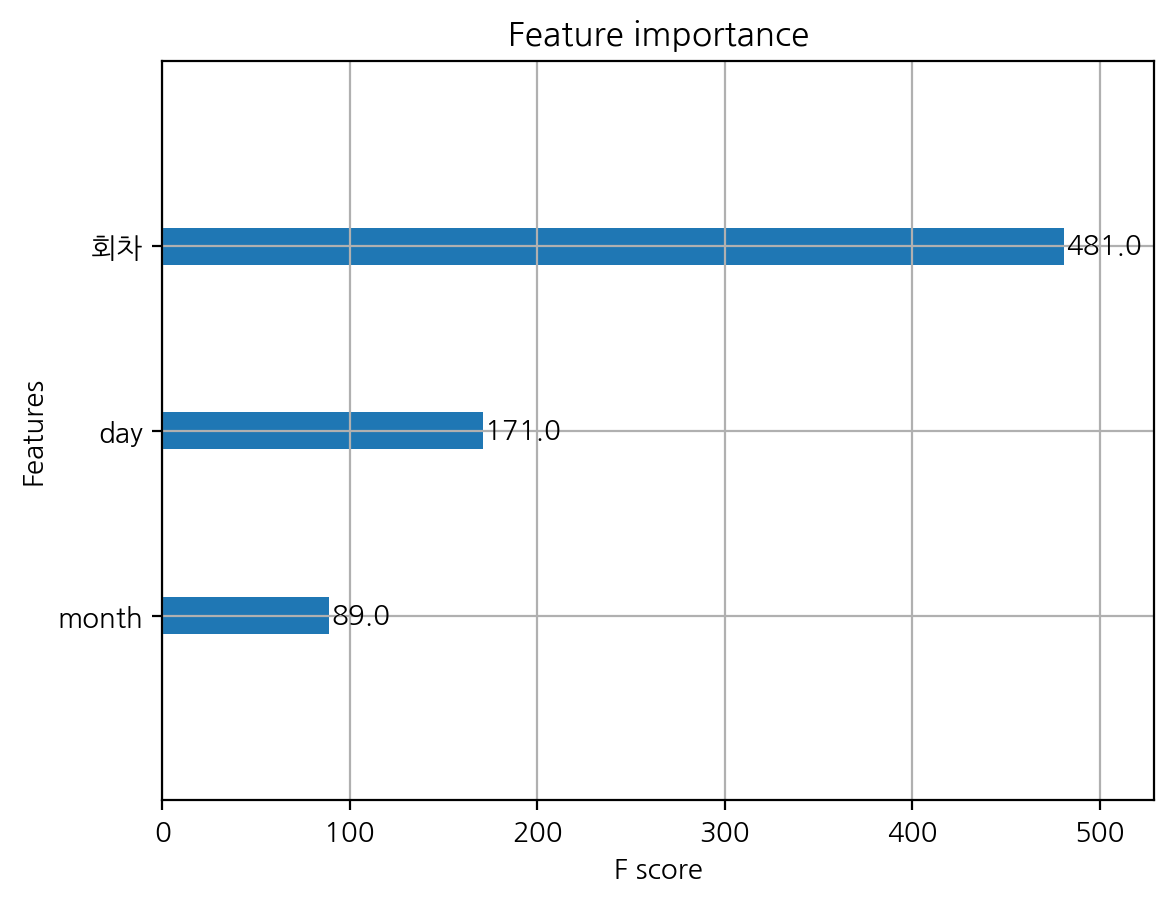

In [69]:
xgb.plot_importance(model_xgb)

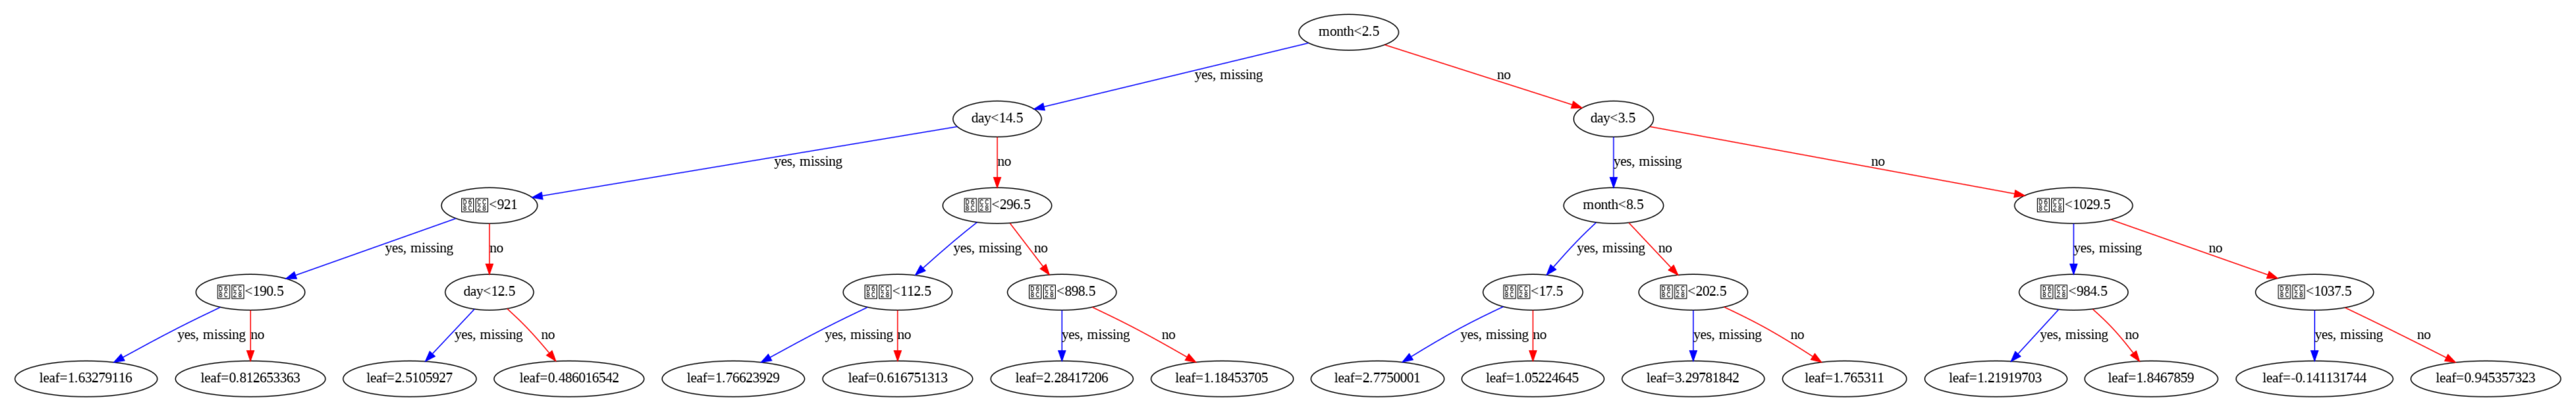

In [70]:
xgb.plot_tree(model_xgb, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(30, 20)

In [71]:
score_xgb = model_xgb.score(X_valid, y_valid)
score_xgb

-0.28948314239195594

In [72]:
y_pred_xgb = model_xgb.predict(X_valid)
y_pred_xgb[:5]

array([4.4945383, 4.6919546, 3.5533848, 4.8666077, 9.795721 ],
      dtype=float32)

In [74]:
xgb_predict =y_pred_xgb.round().astype(int)
xgb_predict

array([ 4,  5,  4,  5, 10,  9,  6,  7,  3,  8,  5,  8,  5,  3,  6,  5,  6,
        5,  6,  6,  6,  7,  6,  8,  5,  5,  8,  7,  4,  3, 12,  7, 10,  5,
        5,  9,  5,  4,  4,  7,  7,  7,  4,  6,  5,  5,  4,  5,  6, 11,  5,
        6,  7,  7,  9,  7,  4,  6,  4,  8,  9,  8,  3,  7,  7, 13,  3, 14,
        6,  5,  6,  5,  8,  5,  7,  7, 12, 12,  5,  6,  7,  5,  9,  6,  8,
        7,  5,  8, 13,  8,  7,  3,  8,  5,  6,  5,  9,  5,  5,  3,  5, 11,
        4,  5,  6,  9,  8,  7,  7,  5, 10,  8,  4,  8,  4,  7,  3,  4,  7,
        4,  6,  5,  4,  7,  7,  9,  5,  3,  8,  8, 10,  2,  4,  6, 10, 11,
       13,  6, 10,  5,  9,  6,  8,  5,  8,  7,  8,  9,  7,  7,  3,  7,  7,
       13,  7,  6, 11, 12,  6,  8,  6,  8,  5,  6,  5, 20, 12,  8,  8,  9,
        6,  5,  5,  8,  4,  6,  5,  5,  5,  5,  6, 10,  3,  3, 11,  7,  8,
        4,  9, 11,  3,  5,  6, 11, 11,  9, 10,  6,  8, 13,  6,  7,  8,  5,
        5,  8, 11,  3,  8,  6,  9,  6,  5])

In [77]:
y_xgb = pd.DataFrame(y_valid)
y_xgb["predict"] = xgb_predict
y_xgb

1  predict
31     3        4
1053   1        5
413   11        4
746    2        5
796    3       10
...   ..      ...
583    3        8
55    15        6
120    2        9
1005   6        6
25     2        5

[213 rows x 2 columns]

In [79]:
(y_xgb[1] == y_xgb["predict"]).sum() , 16/213*100

(16, 7.511737089201878)

<Axes: xlabel='1', ylabel='predict'>

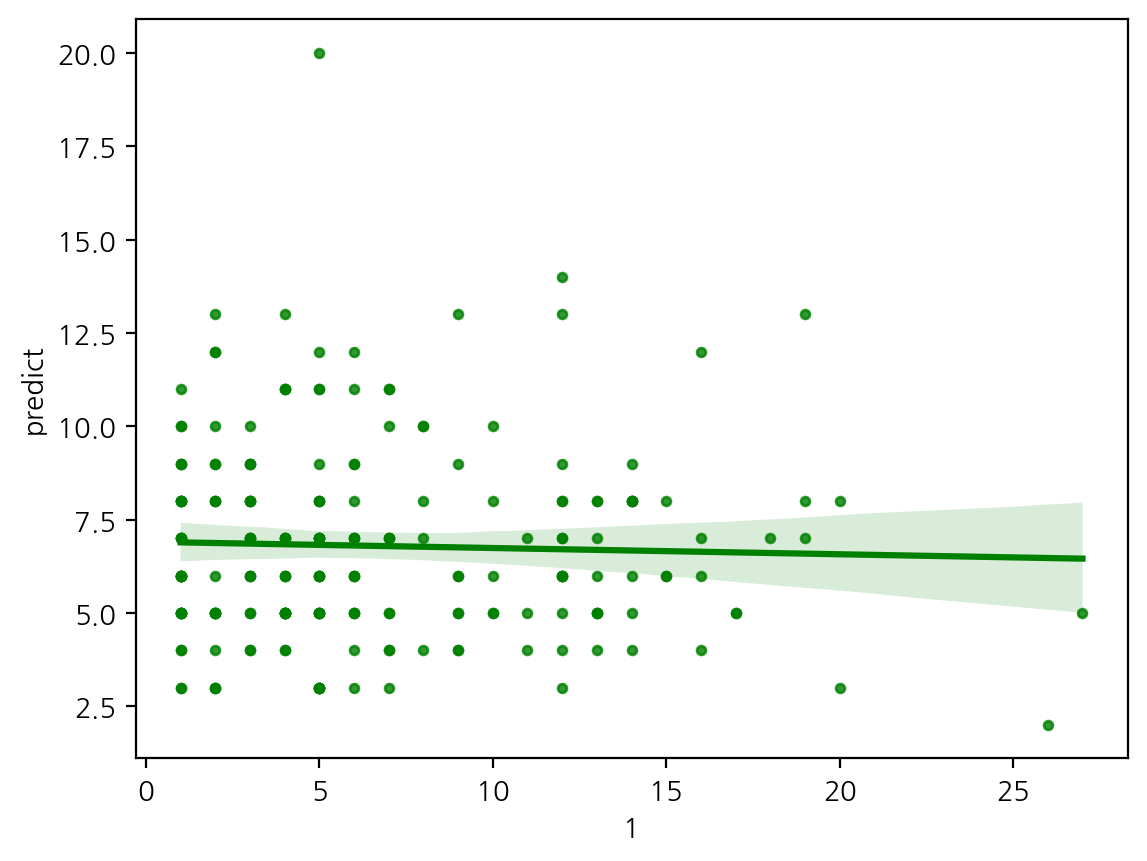

In [81]:
sns.regplot(data=y_xgb, x=y_xgb[1], y=y_xgb["predict"], color="Green", scatter_kws={"s": 10}, )

- 역시 이건 좀 아닌것 같은데
- 다음 회차의 번호와의 차이를 변수로 만들어보면 어떨까?

In [86]:
lotto["diff_1"] = lotto[1].diff()
lotto["diff_2"] = lotto[2].diff()
lotto["diff_3"] = lotto[3].diff()
lotto["diff_4"] = lotto[4].diff()
lotto["diff_5"] = lotto[5].diff()
lotto["diff_6"] = lotto[6].diff()
lotto["diff_bonus"] = lotto["보너스"].diff()
lotto.head(10)

회차        추첨일   1   2   3   4   5   6  보너스  year  month  day  diff_1  \
0  1064 2023-04-22   3   6   9  18  22  35   14  2023      4   22     NaN   
1  1063 2023-04-15   3   6  22  23  24  38   30  2023      4   15     0.0   
2  1062 2023-04-08  20  31  32  40  41  45   12  2023      4    8    17.0   
3  1061 2023-04-01   4  24  27  35  37  45   15  2023      4    1   -16.0   
4  1060 2023-03-25   3  10  24  33  38  45   36  2023      3   25    -1.0   
5  1059 2023-03-18   7  10  22  25  34  40   27  2023      3   18     4.0   
6  1058 2023-03-11  11  23  25  30  32  40   42  2023      3   11     4.0   
7  1057 2023-03-04   8  13  19  27  40  45   12  2023      3    4    -3.0   
8  1056 2023-02-25  13  20  24  32  36  45   29  2023      2   25     5.0   
9  1055 2023-02-18   4   7  12  14  22  33   31  2023      2   18    -9.0   

   diff_2  diff_3  diff_4  diff_5  diff_6  diff_bonus  
0     NaN     NaN     NaN     NaN     NaN         NaN  
1     0.0    13.0     5.0     2.0     3.0        16.0  
2    25.0    10.0    17.0    17.0     7.0       -18.0  
3    -7.0    -5.0    -5.0    -4.0     0.0         3.0  
4   -14.0    -3.0    -2.0     1.0     0.0        21.0  
5     0.0    -2.0    -8.0    -4.0    -5.0        -9.0  
6    13.0     3.0     5.0    -2.0     0.0        15.0  
7   -10.0    -6.0    -3.0     8.0     5.0       -30.0  
8     7.0     5.0     5.0    -4.0     0.0        17.0  
9   -13.0   -12.0   -18.0   -14.0   -12.0         2.0

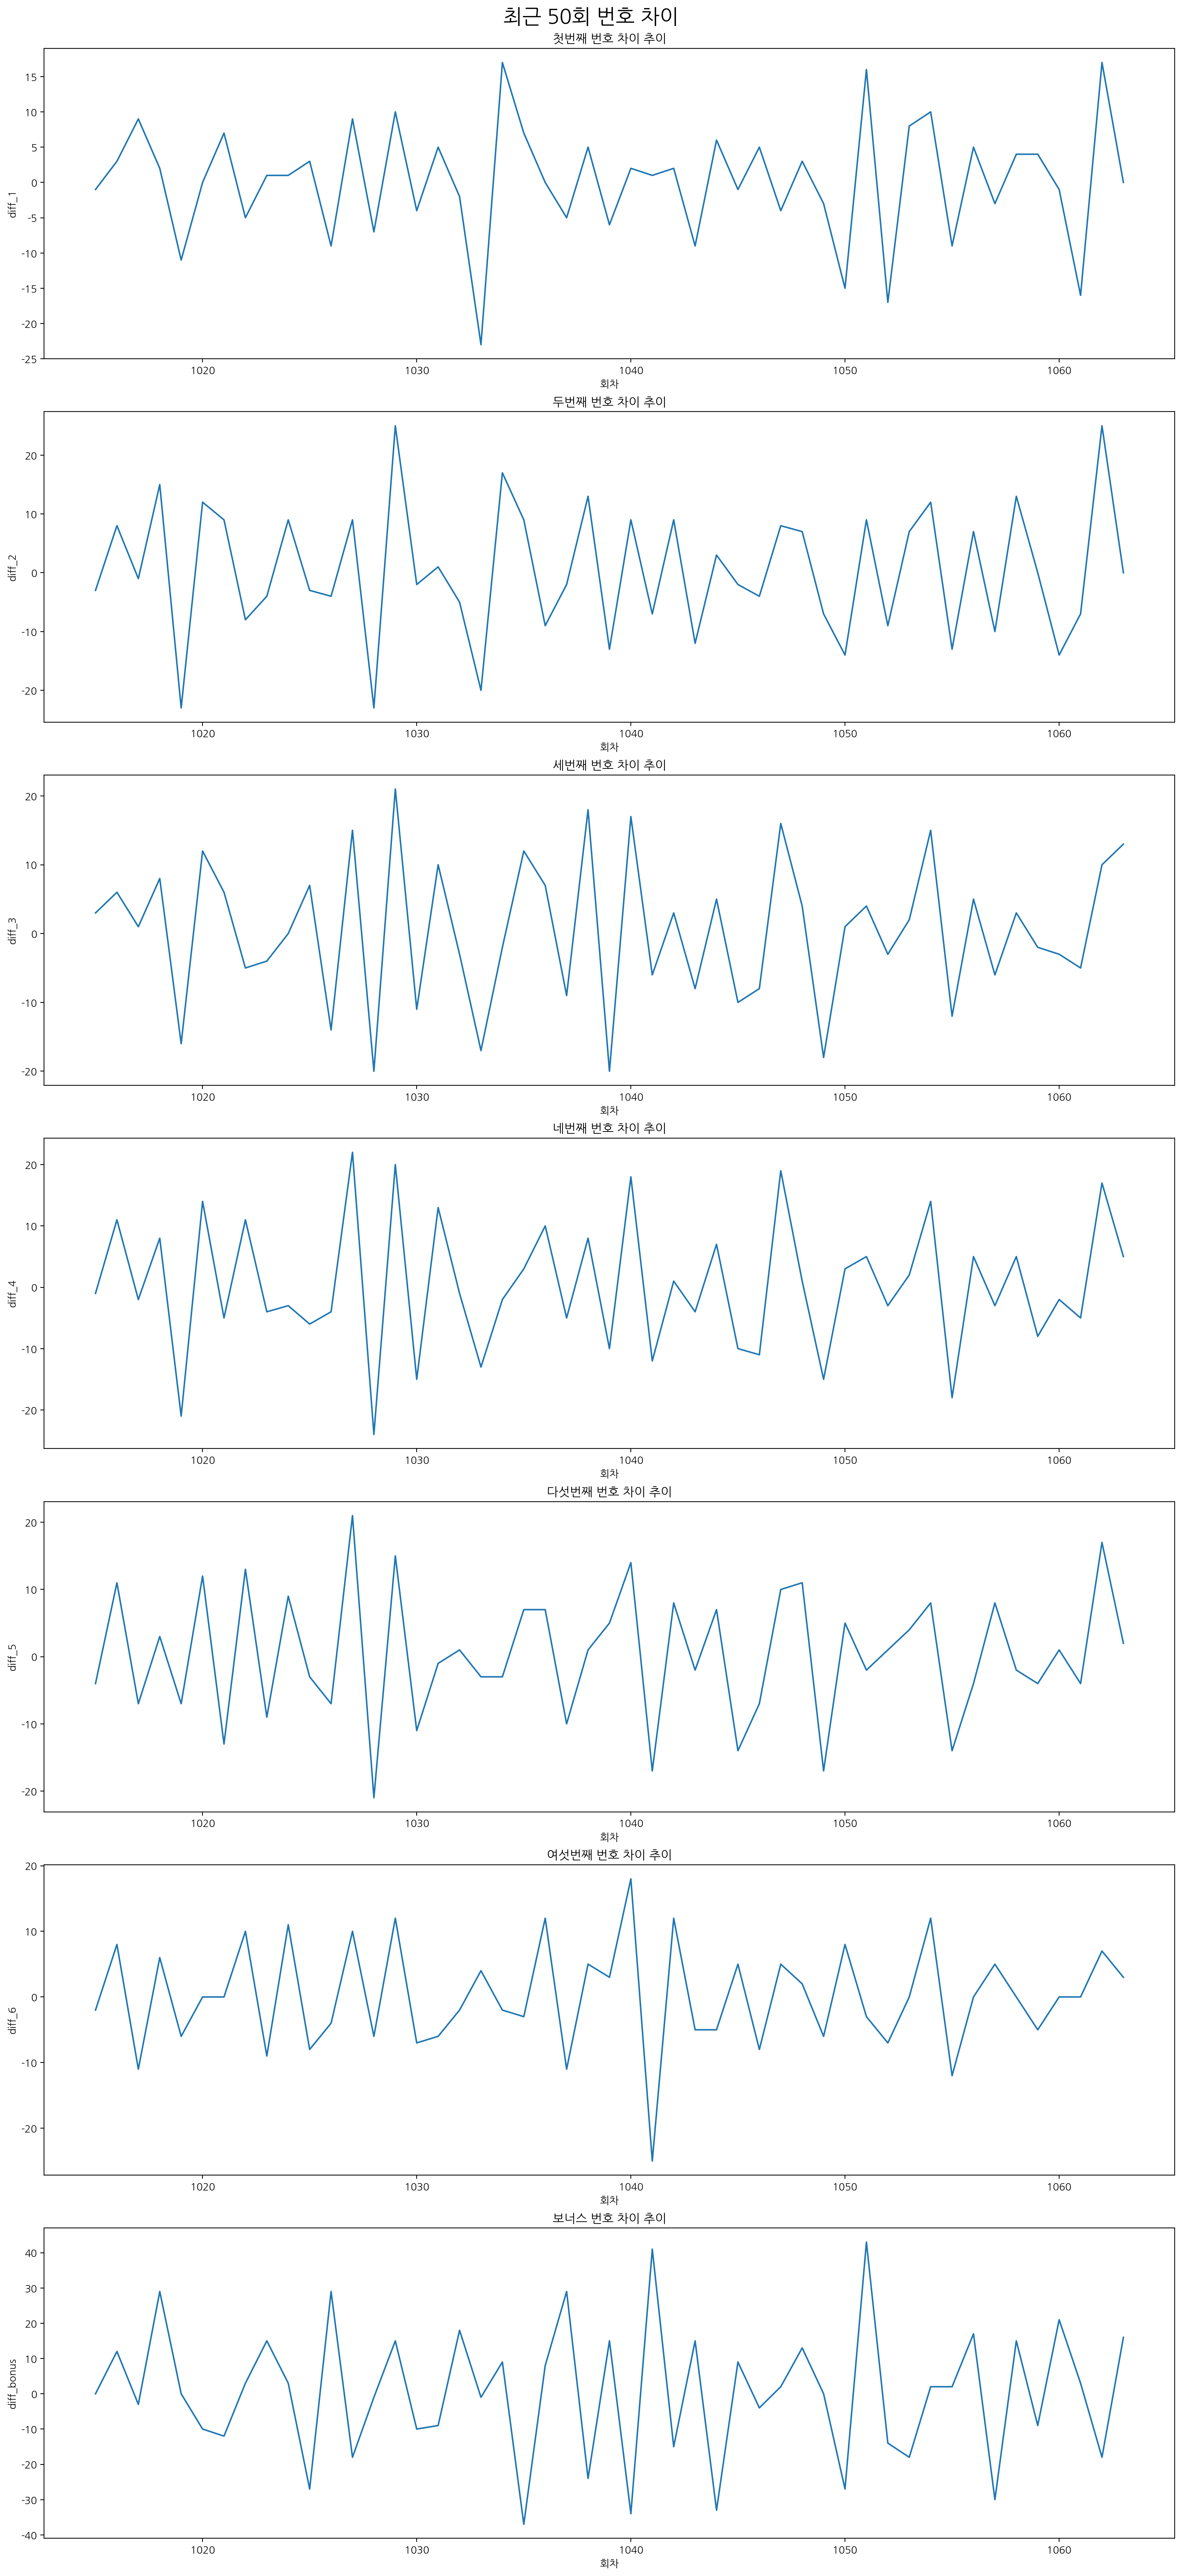

In [87]:
fig, axes = plt.subplots(7, 1, figsize=(16, 35), layout='constrained')
fig.suptitle("최근 50회 번호 차이", fontsize=20)
sns.lineplot(data=lotto.head(50), x="회차", y="diff_1", ax=axes[0]).set_title("첫번째 번호 차이 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="diff_2", ax=axes[1]).set_title("두번째 번호 차이 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="diff_3", ax=axes[2]).set_title("세번째 번호 차이 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="diff_4", ax=axes[3]).set_title("네번째 번호 차이 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="diff_5", ax=axes[4]).set_title("다섯번째 번호 차이 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="diff_6", ax=axes[5]).set_title("여섯번째 번호 차이 추이")
sns.lineplot(data=lotto.head(50), x="회차", y="diff_bonus", ax=axes[6]).set_title("보너스 번호 차이 추이");

In [93]:
lotto.describe()

회차            1            2            3            4  \
count  1064.000000  1064.000000  1064.000000  1064.000000  1064.000000   
mean    532.500000     6.701128    13.094925    19.983083    26.267857   
std     307.294647     5.350812     6.896317     7.463659     7.593052   
min       1.000000     1.000000     2.000000     3.000000     5.000000   
25%     266.750000     2.000000     8.000000    14.000000    21.000000   
50%     532.500000     5.000000    12.000000    19.000000    26.500000   
75%     798.250000    10.000000    18.000000    26.000000    32.000000   
max    1064.000000    35.000000    37.000000    40.000000    43.000000   

                 5            6          보너스         year        month  \
count  1064.000000  1064.000000  1064.000000  1064.000000  1064.000000   
mean     32.836466    39.514098    22.439850  2012.622180     6.482143   
std       6.868442     5.304091    13.173284     5.894184     3.474631   
min       9.000000    18.000000     1.000000  2002.000000     1.000000   
25%      28.000000    37.000000    11.000000  2008.000000     3.000000   
50%      34.000000    41.000000    23.000000  2013.000000     6.000000   
75%      38.000000    44.000000    34.000000  2018.000000    10.000000   
max      44.000000    45.000000    45.000000  2023.000000    12.000000   

               day       diff_1       diff_2       diff_3       diff_4  \
count  1064.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean     15.720865     0.006585     0.015992     0.018815     0.014111   
std       8.796010     7.568579     9.590226    10.297716    10.671820   
min       1.000000   -28.000000   -27.000000   -30.000000   -32.000000   
25%       8.000000    -4.000000    -6.000000    -7.000000    -8.000000   
50%      16.000000     0.000000     0.000000     0.000000     0.000000   
75%      23.000000     4.000000     6.000000     7.000000     8.000000   
max      31.000000    28.000000    30.000000    26.000000    26.000000   

            diff_5       diff_6   diff_bonus  
count  1063.000000  1063.000000  1063.000000  
mean      0.014111     0.004704     0.001881  
std       9.727298     7.644587    18.849838  
min     -31.000000   -26.000000   -43.000000  
25%      -6.000000    -4.000000   -14.000000  
50%       0.000000     0.000000     0.000000  
75%       7.000000     4.000000    14.000000  
max      27.000000    24.000000    44.000000

In [94]:
lotto.head(26)

회차        추첨일   1   2   3   4   5   6  보너스  year  month  day  diff_1  \
0   1064 2023-04-22   3   6   9  18  22  35   14  2023      4   22     NaN   
1   1063 2023-04-15   3   6  22  23  24  38   30  2023      4   15     0.0   
2   1062 2023-04-08  20  31  32  40  41  45   12  2023      4    8    17.0   
3   1061 2023-04-01   4  24  27  35  37  45   15  2023      4    1   -16.0   
4   1060 2023-03-25   3  10  24  33  38  45   36  2023      3   25    -1.0   
5   1059 2023-03-18   7  10  22  25  34  40   27  2023      3   18     4.0   
6   1058 2023-03-11  11  23  25  30  32  40   42  2023      3   11     4.0   
7   1057 2023-03-04   8  13  19  27  40  45   12  2023      3    4    -3.0   
8   1056 2023-02-25  13  20  24  32  36  45   29  2023      2   25     5.0   
9   1055 2023-02-18   4   7  12  14  22  33   31  2023      2   18    -9.0   
10  1054 2023-02-11  14  19  27  28  30  45   33  2023      2   11    10.0   
11  1053 2023-02-04  22  26  29  30  34  45   15  2023      2    4     8.0   
12  1052 2023-01-28   5  17  26  27  35  38    1  2023      1   28   -17.0   
13  1051 2023-01-21  21  26  30  32  33  35   44  2023      1   21    16.0   
14  1050 2023-01-14   6  12  31  35  38  43   17  2023      1   14   -15.0   
15  1049 2023-01-07   3   5  13  20  21  37   17  2023      1    7    -3.0   
16  1048 2022-12-31   6  12  17  21  32  39   30  2022     12   31     3.0   
17  1047 2022-12-24   2  20  33  40  42  44   32  2022     12   24    -4.0   
18  1046 2022-12-17   7  16  25  29  35  36   28  2022     12   17     5.0   
19  1045 2022-12-10   6  14  15  19  21  41   37  2022     12   10    -1.0   
20  1044 2022-12-03  12  17  20  26  28  36    4  2022     12    3     6.0   
21  1043 2022-11-26   3   5  12  22  26  31   19  2022     11   26    -9.0   
22  1042 2022-11-19   5  14  15  23  34  43    4  2022     11   19     2.0   
23  1041 2022-11-12   6   7   9  11  17  18   45  2022     11   12     1.0   
24  1040 2022-11-05   8  16  26  29  31  36   11  2022     11    5     2.0   
25  1039 2022-10-29   2   3   6  19  36  39   26  2022     10   29    -6.0   

    diff_2  diff_3  diff_4  diff_5  diff_6  diff_bonus  
0      NaN     NaN     NaN     NaN     NaN         NaN  
1      0.0    13.0     5.0     2.0     3.0        16.0  
2     25.0    10.0    17.0    17.0     7.0       -18.0  
3     -7.0    -5.0    -5.0    -4.0     0.0         3.0  
4    -14.0    -3.0    -2.0     1.0     0.0        21.0  
5      0.0    -2.0    -8.0    -4.0    -5.0        -9.0  
6     13.0     3.0     5.0    -2.0     0.0        15.0  
7    -10.0    -6.0    -3.0     8.0     5.0       -30.0  
8      7.0     5.0     5.0    -4.0     0.0        17.0  
9    -13.0   -12.0   -18.0   -14.0   -12.0         2.0  
10    12.0    15.0    14.0     8.0    12.0         2.0  
11     7.0     2.0     2.0     4.0     0.0       -18.0  
12    -9.0    -3.0    -3.0     1.0    -7.0       -14.0  
13     9.0     4.0     5.0    -2.0    -3.0        43.0  
14   -14.0     1.0     3.0     5.0     8.0       -27.0  
15    -7.0   -18.0   -15.0   -17.0    -6.0         0.0  
16     7.0     4.0     1.0    11.0     2.0        13.0  
17     8.0    16.0    19.0    10.0     5.0         2.0  
18    -4.0    -8.0   -11.0    -7.0    -8.0        -4.0  
19    -2.0   -10.0   -10.0   -14.0     5.0         9.0  
20     3.0     5.0     7.0     7.0    -5.0       -33.0  
21   -12.0    -8.0    -4.0    -2.0    -5.0        15.0  
22     9.0     3.0     1.0     8.0    12.0       -15.0  
23    -7.0    -6.0   -12.0   -17.0   -25.0        41.0  
24     9.0    17.0    18.0    14.0    18.0       -34.0  
25   -13.0   -20.0   -10.0     5.0     3.0        15.0

## 자료소자 및 적용(1)
- https://superhky.tistory.com/115
- XGB 로 로또 번호의 합을 예측하고 그 합이 되도록 숫자를 나누기

In [135]:
lotto["sum"] = lotto[[1,2,3,4,5,6]].sum(axis=1)
lotto[[1,2,3,4,5,6,"sum"]]

1   2   3   4   5   6  sum
0      3   6   9  18  22  35   93
1      3   6  22  23  24  38  116
2     20  31  32  40  41  45  209
3      4  24  27  35  37  45  172
4      3  10  24  33  38  45  153
...   ..  ..  ..  ..  ..  ..  ...
1059  16  24  29  40  41  42  192
1060  14  27  30  31  40  42  184
1061  11  16  19  21  27  31  125
1062   9  13  21  25  32  42  142
1063  10  23  29  33  37  40  172

[1064 rows x 7 columns]

<Axes: >

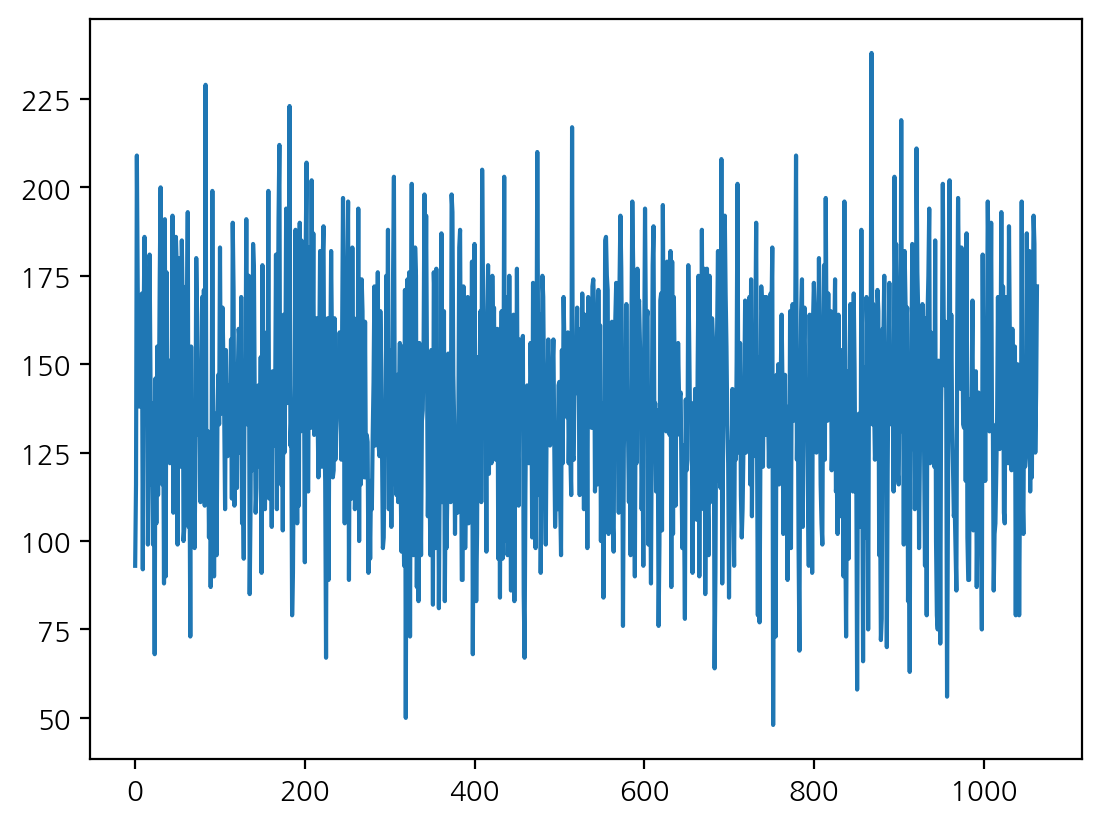

In [136]:
lotto["sum"].plot()

In [137]:
X = lotto[['회차', 'year', 'month', 'day']]
y = lotto["sum"]

print(X.shape, y.shape)

(1064, 4) (1064,)


In [138]:
X_train, X_valid, y_train, y_valid  = train_test_split(X, y, test_size=0.2, random_state=42, )

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((851, 4), (213, 4), (851,), (213,))

In [139]:
model_xgb = xgb.XGBRegressor(random_state=42, n_jobs=-1, max_depth=4, n_estimators=200, gamma=10)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [140]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [142]:
sum_predict = model_xgb.predict(X_valid)
sum_predict = sum_predict.round().astype(int)
sum_predict[:10]

array([141, 136, 150, 143, 160, 153, 149, 122, 117, 136])

In [145]:
sum_ = pd.DataFrame(y_valid)
sum_["predict"] = sum_predict
sum_

sum  predict
31    128      141
1053  164      136
413   138      150
746   137      143
796   133      160
...   ...      ...
583   140      145
55    185      137
120   115      142
1005  196      137
25    105      106

[213 rows x 2 columns]

<Axes: xlabel='sum', ylabel='predict'>

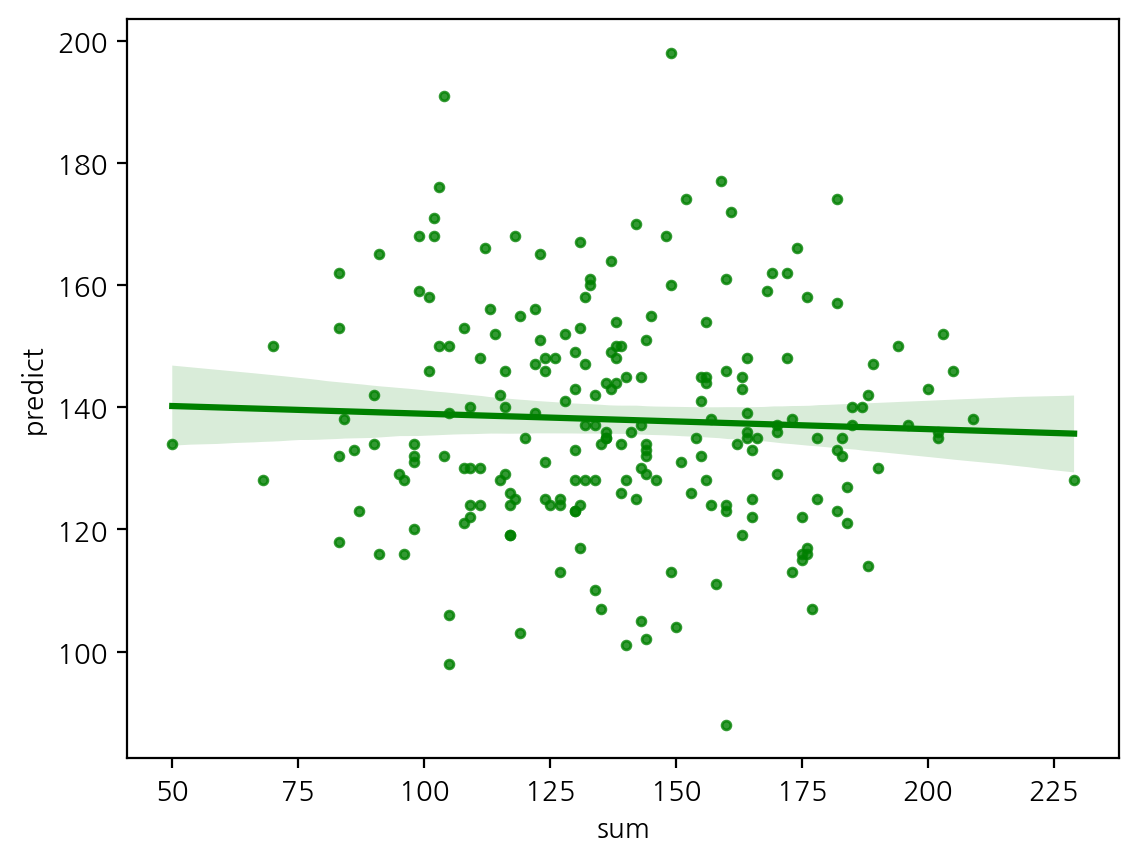

In [146]:
sns.regplot(data=sum_, x=sum_["sum"], y=sum_["predict"], color="Green", scatter_kws={"s": 10}, )

In [148]:
(sum_["sum"] == sum_["predict"]).sum() # ??

1

- 하나만 맞으면거면 이 방법은 채택하지 않는게 좋겠다.

## 자료조사 및 적용(2)

- [당첨률 95%💸 복권 94주 연속 당첨 LO또 명인의 억 소리 나는 당첨 비법](https://youtu.be/o3ooUfVvaXE)
- 지난 6개월간 3~4번만 나온 숫자 공략하기

In [95]:
lotto_26 = lotto.head(26)
count_num = pd.concat([lotto_26[1], lotto_26[2], lotto_26[3], lotto_26[4], lotto_26[5], lotto_26[6]]).value_counts().sort_index()

In [102]:
count_num.nsmallest(20)

42    1
44    1
2     2
4     2
8     2
9     2
10    2
11    2
15    2
16    2
18    2
28    2
37    2
39    2
41    2
43    2
13    3
23    3
25    3
29    3
dtype: int64

In [101]:
count_num.nlargest(12)

6     7
45    7
3     6
22    6
26    6
35    6
12    5
20    5
32    5
36    5
40    5
5     4
dtype: int64

- 1년이라면 어떨까

In [103]:
lotto_52 = lotto.head(52)
count_num52 = pd.concat([lotto_52[1], lotto_52[2], lotto_52[3], lotto_52[4], lotto_52[5], lotto_52[6]]).value_counts().sort_index()

In [150]:
lotto.head(3)[[1,2,3,4,5,6]]

1   2   3   4   5   6
0   3   6   9  18  22  35
1   3   6  22  23  24  38
2  20  31  32  40  41  45

In [104]:
count_num52.nsmallest(20)

1     2
43    2
4     3
8     3
10    3
28    3
44    4
2     5
9     5
16    5
23    5
25    5
39    5
42    5
11    6
13    6
15    6
19    6
21    6
30    6
dtype: int64

In [107]:
count_num52.nlargest(15)

45    13
12    12
22    12
35    12
6     10
14    10
26    10
32    10
3      9
5      9
27     9
29     9
34     9
20     8
33     8
dtype: int64

- 라인플롯으로 6번호 함께 그려보기

<Axes: >

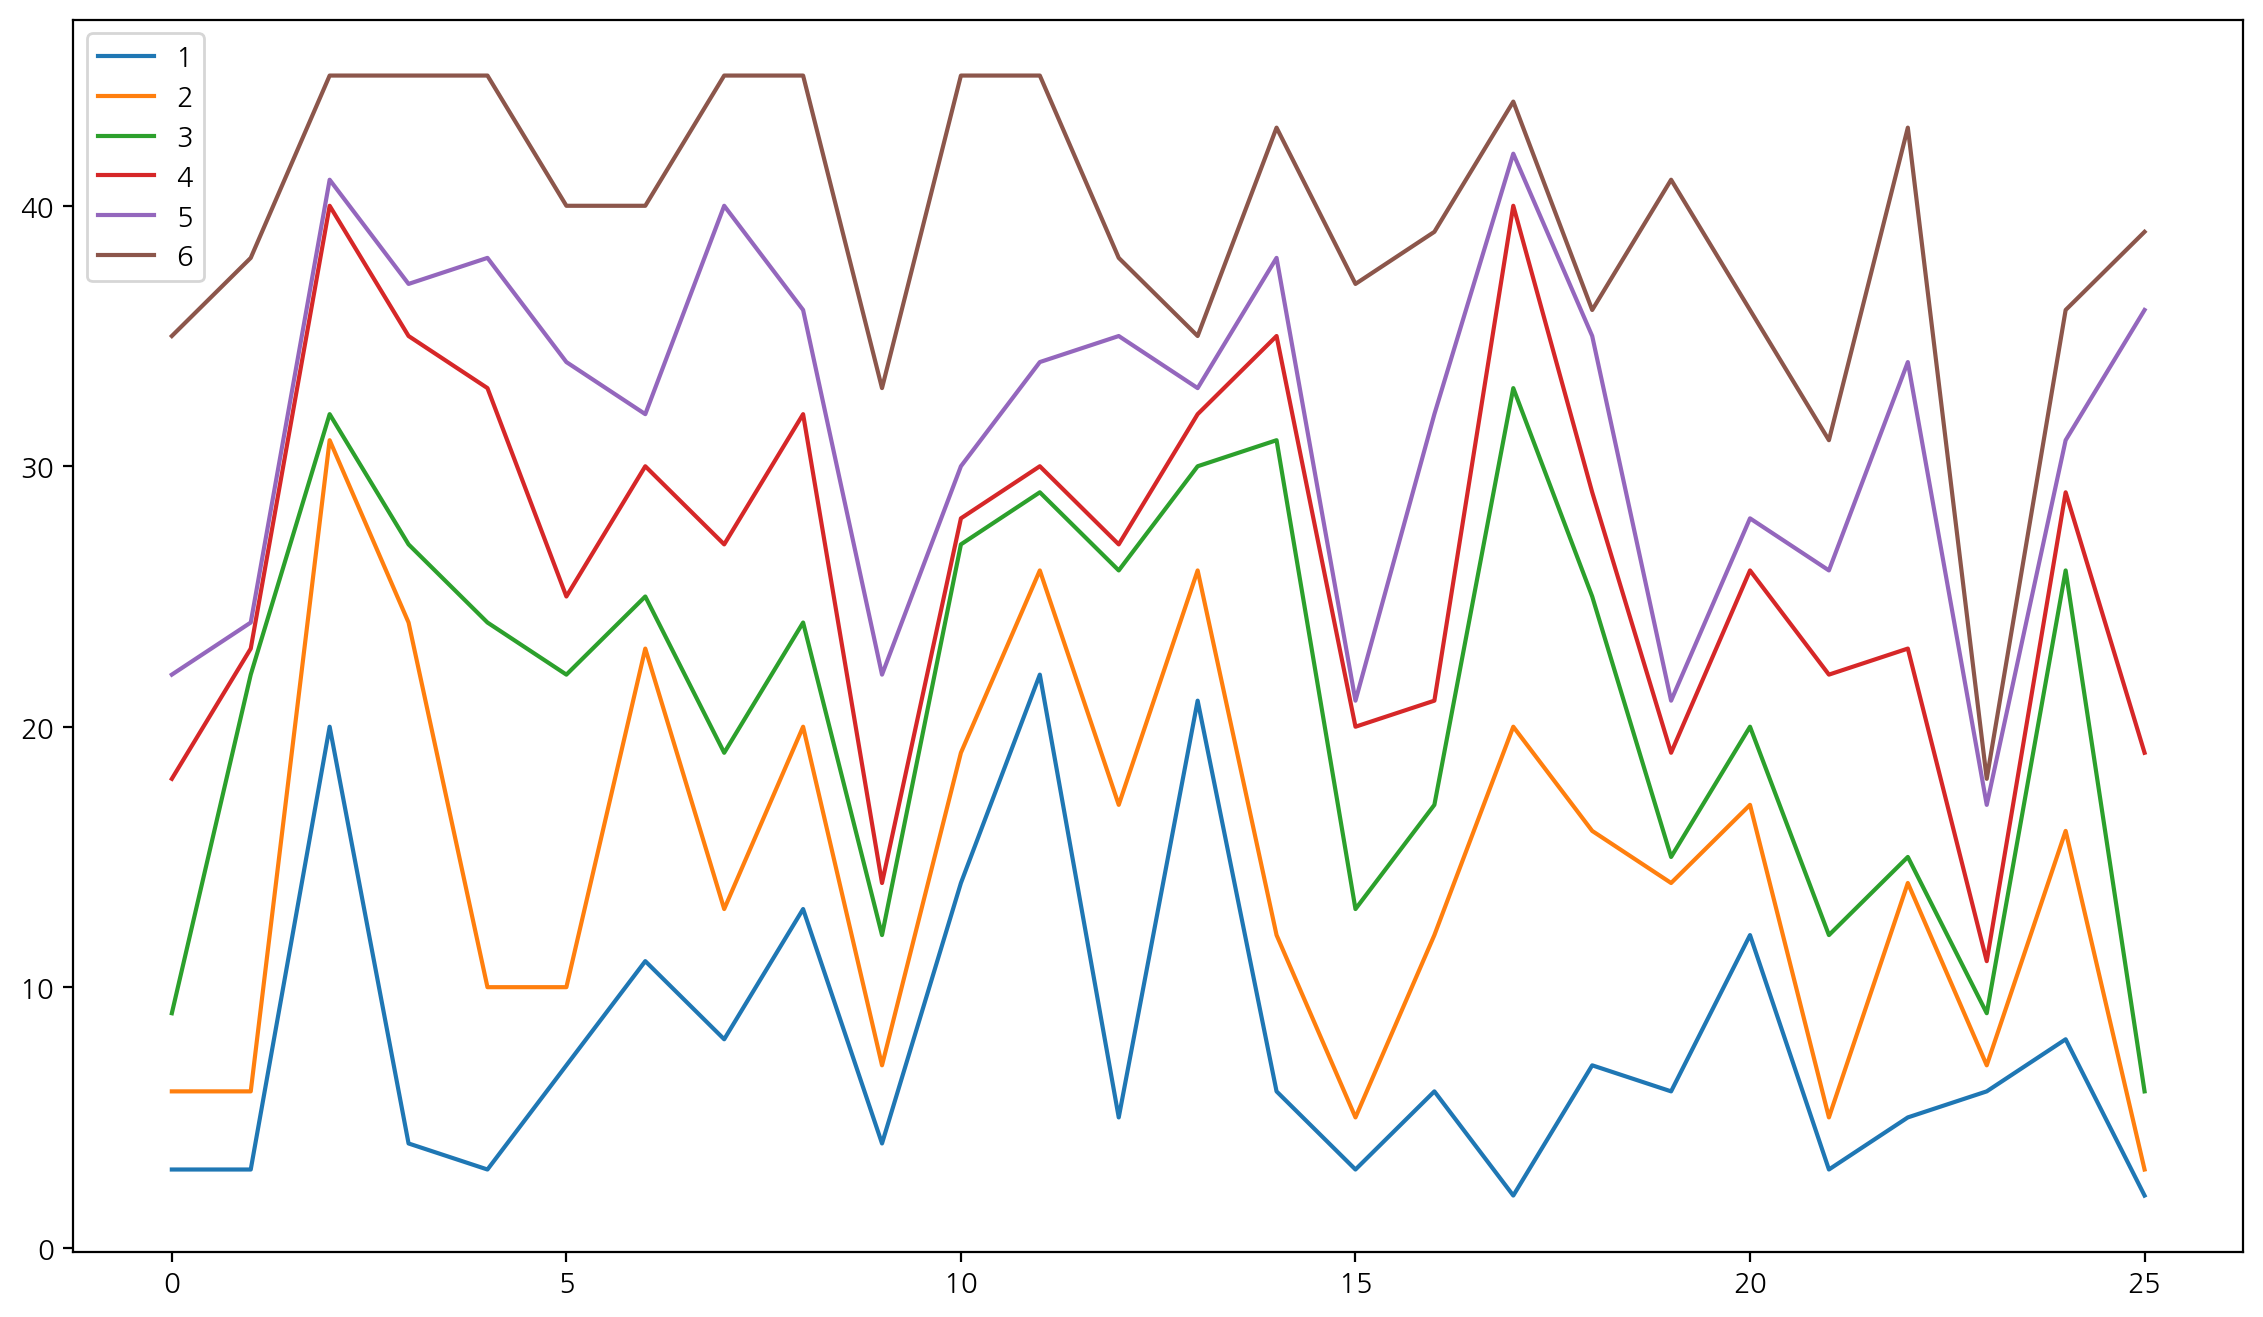

In [129]:
# 참고
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

lotto[[1,2,3,4,5,6]].head(26).plot(figsize=(14,8))

- 지난번 당첨 숫자 : 3	6	9	18	22	35
- 지지난번 당첨 숫자 : 3	6	22	23	24	38
- 지지지난번 당첨 숫자 : 20	31	32	40	41	45
- 4번째 숫까 까지는 더 커질 것이고, 다섯 여섯번째 숫자도 더 커질 것 같다
- 지난 6개월간 가장 많이 안나온 숫자이다.

1     
42    
44    
2     
4     
8     
9     
10    
11    
15    
16    
18    
28    
37    
39    
41    
43    
- 1년간 가장 많이 안나온 숫자이다. 

1     
43    
4     
8     
10    
28    
44    


In [152]:
lotto[[1,2,3,4,5,6]].head()

1   2   3   4   5   6
0   3   6   9  18  22  35
1   3   6  22  23  24  38
2  20  31  32  40  41  45
3   4  24  27  35  37  45
4   3  10  24  33  38  45

- 42, 44 가 나올 것 같다. 
- 9, 18, 35 가 다시 나올 수 있다. 
- 35, 38이 또 등잘 할 것 같다. 

<br>

- 첫째 자리는 8 or 10
- 두번째 자리는 15,16,18
- 마지막 자리는 41, 42, 44
- 20번대는 28, 24
- 근데 1번 나올때 안됐나..?


### EDA 결과로 궁예하기

- 1,8,10,18,41,44
- 10, 16, 24, 38, 42, 44
- 1, 9, 15, 27, 38, 43
- 1, 18, 23, 28, 39, 43
- 10, 18, 22, 28, 42, 43

## 자료조사 및 적용(3)
- [딥러닝이 예측한 로또 번호는 당첨이 잘될까?](https://youtu.be/3G3zExNItj0)
- [로또 딥러닝 예측 깃헙](https://github.com/youtube-jocoding/lotto-deeplearning)
- 로또 숫자는 숫자로서의 의미보다는 범주형에 데이터 임으로 원핫인코딩을 해준다. 

In [153]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1
!pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.0 MB/s eta 0:00:00
  Created wheel for h5py: filename=h5py-2.10.0-cp310-cp310-linux_x86_64.whl size=5619873 sha256=5508f38b65a59908a47198c00c1378c1de1b4d97d7fab0c4603342bec117d7e4
  Stored in directory: /root/.cache/pip/whe

In [157]:
def numbers2ohbin(numbers):

    ohbin = np.zeros(45) #45개의 빈 칸을 만듬

    for i in range(6): #여섯개의 당첨번호에 대해서 반복함
        ohbin[int(numbers[i])-1] = 1 #로또번호가 1부터 시작하지만 벡터의 인덱스 시작은 0부터 시작하므로 1을 뺌
    
    return ohbin

In [163]:
def ohbin2numbers(ohbin):

    numbers = []
    
    for i in range(len(ohbin)):
        if ohbin[i] == 1.0: # 1.0으로 설정되어 있으면 해당 번호를 반환값에 추가한다.
            numbers.append(i+1)
    
    return numbers

In [160]:
lotto_array = np.array(lotto[[1,2,3,4,5,6]])
lotto_array

array([[ 3,  6,  9, 18, 22, 35],
       [ 3,  6, 22, 23, 24, 38],
       [20, 31, 32, 40, 41, 45],
       ...,
       [11, 16, 19, 21, 27, 31],
       [ 9, 13, 21, 25, 32, 42],
       [10, 23, 29, 33, 37, 40]])

In [164]:
print(lotto_array[0])
array_test1= numbers2ohbin(lotto_array[0])
array_test1

[ 3  6  9 18 22 35]


array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [165]:
ohbin2numbers(array_test1)

[3, 6, 9, 18, 22, 35]

In [170]:
print(lotto.shape[0])
train_idx = (0, 800)
val_idx = (801, 1000)
test_idx = (1001, 1065)

1064


In [174]:
row_count = lotto.shape[0]
ohbins = list(map(numbers2ohbin, lotto_array))
ohbins

[array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 

In [175]:
x_samples = ohbins[0:row_count-1]
y_samples = ohbins[1:row_count]

In [171]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# 모델을 정의합니다.
model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [176]:
# 매 에포크마다 훈련과 검증의 손실 및 정확도를 기록하기 위한 변수
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))
     

epoch    0 train acc 0.015 loss 0.408 val acc 0.000 loss 0.396
epoch    1 train acc 0.024 loss 0.396 val acc 0.000 loss 0.395
epoch    2 train acc 0.025 loss 0.394 val acc 0.005 loss 0.395
epoch    3 train acc 0.019 loss 0.391 val acc 0.015 loss 0.396
epoch    4 train acc 0.037 loss 0.388 val acc 0.035 loss 0.397
epoch    5 train acc 0.048 loss 0.383 val acc 0.045 loss 0.400
epoch    6 train acc 0.062 loss 0.377 val acc 0.045 loss 0.404
epoch    7 train acc 0.072 loss 0.371 val acc 0.040 loss 0.408
epoch    8 train acc 0.077 loss 0.366 val acc 0.050 loss 0.412
epoch    9 train acc 0.083 loss 0.360 val acc 0.055 loss 0.416
epoch   10 train acc 0.090 loss 0.354 val acc 0.045 loss 0.419
epoch   11 train acc 0.102 loss 0.347 val acc 0.050 loss 0.422
epoch   12 train acc 0.106 loss 0.339 val acc 0.055 loss 0.426
epoch   13 train acc 0.101 loss 0.331 val acc 0.060 loss 0.431
epoch   14 train acc 0.111 loss 0.323 val acc 0.060 loss 0.437
epoch   15 train acc 0.116 loss 0.314 val acc 0.055 los

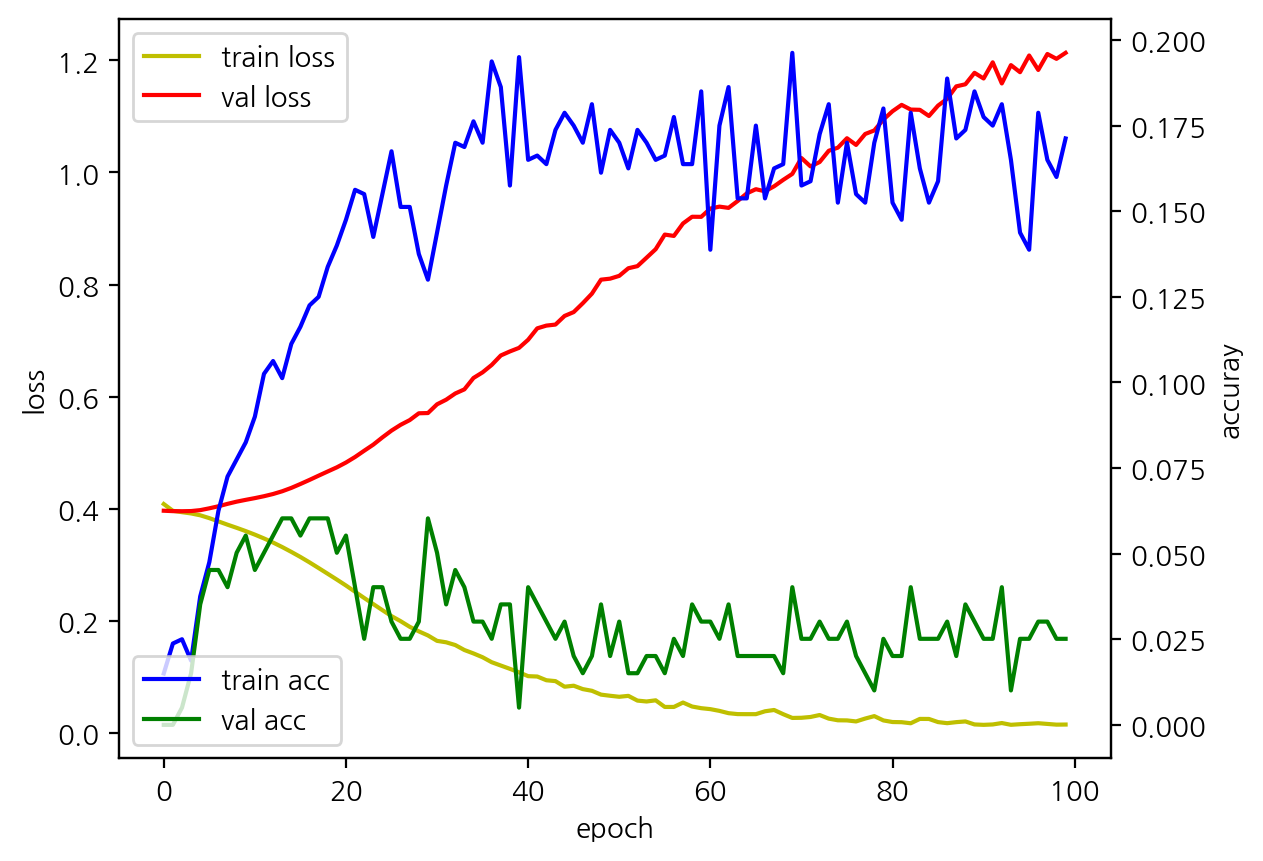

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [178]:
for epoch in range(50):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    for i in range(len(x_samples)):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))  
     

epoch    0 train acc 0.147 loss 0.164
epoch    1 train acc 0.147 loss 0.202
epoch    2 train acc 0.145 loss 0.203
epoch    3 train acc 0.143 loss 0.196
epoch    4 train acc 0.142 loss 0.187
epoch    5 train acc 0.141 loss 0.178
epoch    6 train acc 0.141 loss 0.170
epoch    7 train acc 0.141 loss 0.163
epoch    8 train acc 0.142 loss 0.157
epoch    9 train acc 0.143 loss 0.151
epoch   10 train acc 0.144 loss 0.146
epoch   11 train acc 0.146 loss 0.141
epoch   12 train acc 0.149 loss 0.137
epoch   13 train acc 0.149 loss 0.132
epoch   14 train acc 0.150 loss 0.128
epoch   15 train acc 0.151 loss 0.125
epoch   16 train acc 0.151 loss 0.121
epoch   17 train acc 0.152 loss 0.118
epoch   18 train acc 0.153 loss 0.115
epoch   19 train acc 0.154 loss 0.112
epoch   20 train acc 0.155 loss 0.110
epoch   21 train acc 0.155 loss 0.107
epoch   22 train acc 0.155 loss 0.104
epoch   23 train acc 0.156 loss 0.102
epoch   24 train acc 0.156 loss 0.100
epoch   25 train acc 0.156 loss 0.098
epoch   26 t

In [180]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [181]:
# 마지막 회차까지 학습한 모델로 다음 회차 추론

print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    numbers.sort()
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [6, 18, 35, 37, 42, 43]
1 : [6, 7, 16, 18, 36, 37]
2 : [7, 16, 18, 35, 37, 42]
3 : [6, 16, 18, 28, 42, 43]
4 : [14, 16, 18, 20, 37, 43]
5 : [6, 7, 14, 18, 37, 43]
6 : [6, 7, 16, 18, 35, 37]
7 : [7, 14, 16, 28, 35, 42]
8 : [7, 14, 16, 18, 37, 43]
9 : [6, 7, 16, 18, 19, 37]
